# Task 1

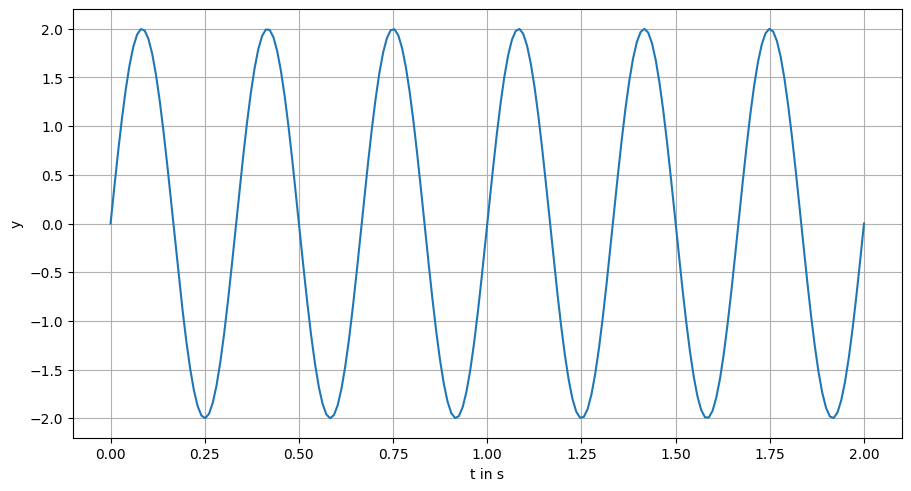

In [155]:
import matplotlib.pyplot as plt
import numpy as np

def plot(t, y, title, plot_fn="plot", *args, **kwargs):
    plot_fn = getattr(plt, plot_fn)
    plot_fn(t, y, *args, **kwargs)
    #plt.title(title)
    plt.xlabel("t in s")
    plt.ylabel("y")
    plt.gcf().set_figwidth(9)

amplitude = 2
frequency = 3

t_vals = np.linspace(0, 2, num=200)
y = amplitude * np.sin(t_vals * (2 * np.pi * frequency))

plt.figure(constrained_layout=True)
plot(t_vals, y, "Sine wave")
plt.grid()

Q: What ist the fundamental period? \
A: $\frac{1}{3}\,\mathrm{s}$

Q: Which frequencies lie in the audible range? \
A: $20\,\mathrm{Hz}$ to $20000\,\mathrm{Hz}$

# Task 2

Text(0, 0.5, 'y')

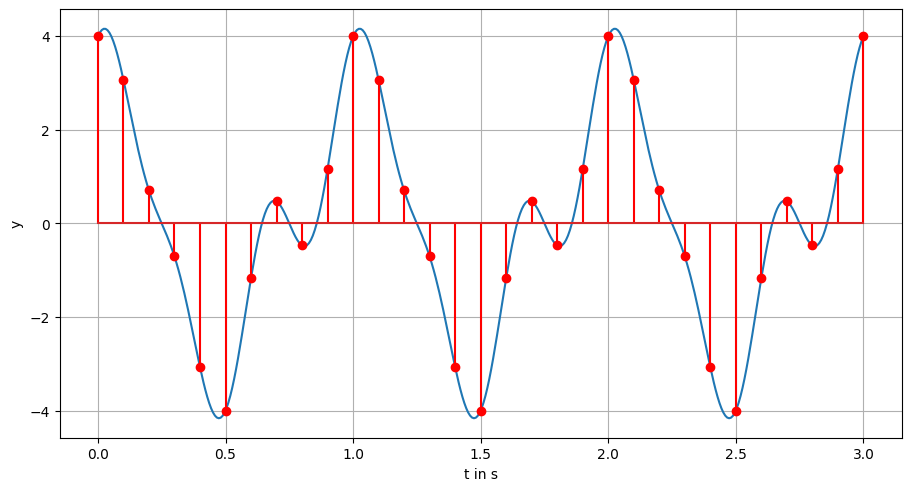

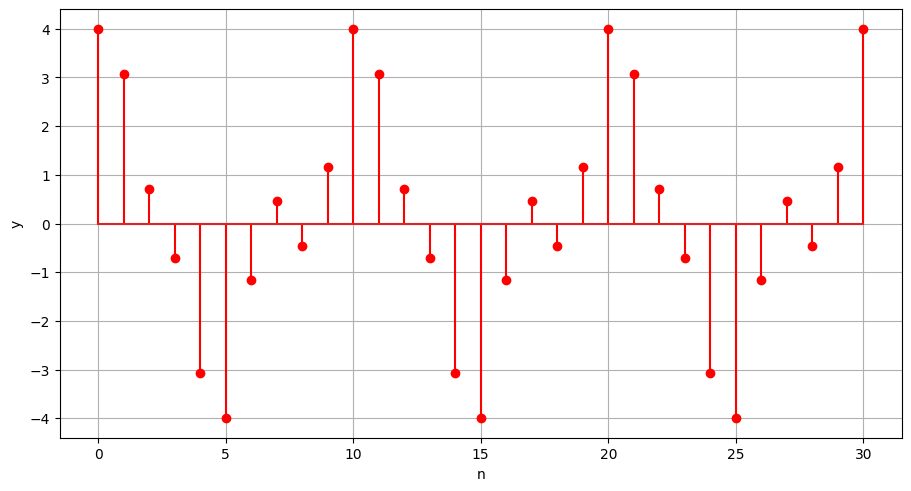

In [156]:
def signal_vals(t):
    return (
        3 * np.cos(t * (2 * np.pi))
            + np.sin(t * (2 * np.pi * 2))
            + np.cos(t * (2 * np.pi * 3))
    )

plt.figure(constrained_layout=True)
t_vals = np.linspace(0, 3, num=400)
sa = signal_vals(t_vals)
plot(t_vals, sa, "Compound sine signal")

fs = 10
n_vals = np.linspace(0, 3, num=3 * fs + 1)
s = signal_vals(n_vals)
plot(n_vals, s, "Compound sine signal", "stem", "red")
plt.grid()

def plot_samples_only(ax, fs, s):
    ax.stem(np.arange(3 * fs + 1), s, "red")
    ax.grid()

plt.figure(constrained_layout=True).set_figwidth(9)
plot_samples_only(plt.gca(), fs, s)
plt.xlabel("n")
plt.ylabel("y")

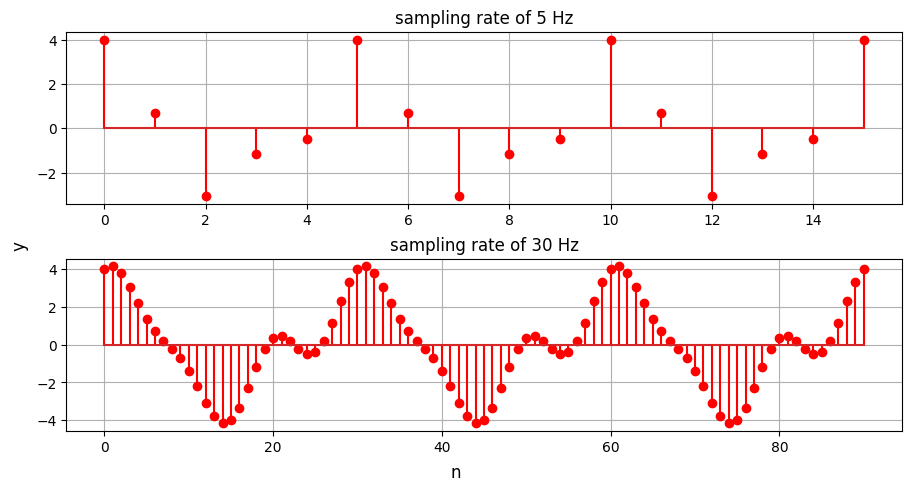

In [157]:
fig, (ax1, ax2) = plt.subplots(nrows=2, constrained_layout=True)
fig.supxlabel("n")
fig.supylabel("y")
fig.set_figwidth(9)

alt_fs = 5
alt_n_vals = np.linspace(0, 3, num=3 * alt_fs + 1)
alt_s = signal_vals(alt_n_vals)
plot_samples_only(ax1, alt_fs, alt_s)
ax1.title.set_text("sampling rate of 5 Hz")

alt_fs = 30
alt_n_vals = np.linspace(0, 3, num=3 * alt_fs + 1)
alt_s = signal_vals(alt_n_vals)
plot_samples_only(ax2, alt_fs, alt_s)
ax2.title.set_text("sampling rate of 30 Hz")

Q: What ist the fundamental frequency? \
A: $1\,\mathrm{Hz}$

Q: What are the frequencies of the component sine signals? \
A: $1\,\mathrm{Hz}, 2\,\mathrm{Hz}, 3\,\mathrm{Hz}$

Q: Is it possible to reconstruct the original analog signal from the sampled values? \
A: \
No. Generally speaking, there will always be several different analog signals which will produce the same sequence when they are sampled. So when reconstructing the signal, there will always be ambiguity. In other words, there is a loss of information when sampling a signal. \
However, there are methods to reconstruct one of the possible analog signals. These methods will assume that the most basic one of the possible input signals is correct. The reconstruction method can yield very good results as long as the sampling frequency was set to be high enough, i.e. enough detail is provided.

Text(0, 0.5, 'y')

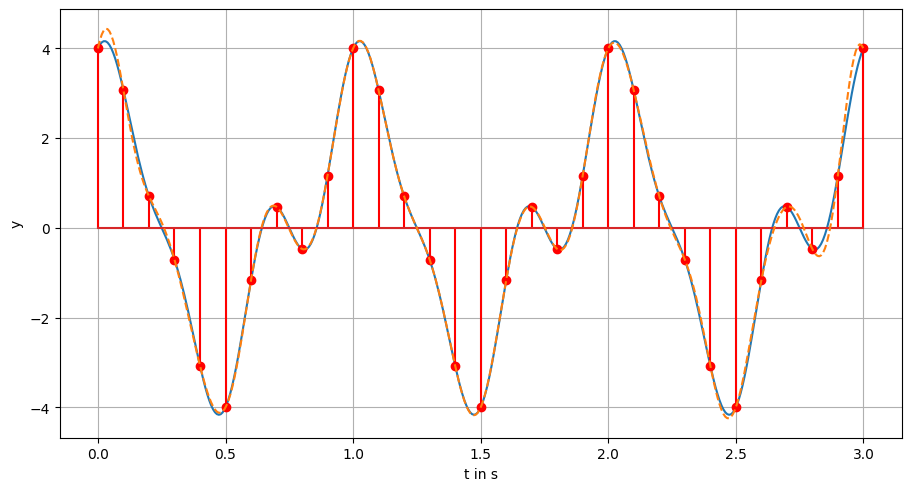

In [158]:
def reconstruct(sample_vals: np.ndarray, fs: int, t_vals: np.ndarray) -> np.ndarray:
    # Construct n_vals, the array of t-positions of the samples
    n_vals = np.linspace(0, t_vals[-1], sample_vals.size)

    s_rec = np.zeros(t_vals.size)
    for i, t in enumerate(t_vals):
        # Dot product is the same as a sum of products
        s_rec[i] = np.dot(sample_vals, np.sinc((t - n_vals) * fs))

    return s_rec

def plot_with_reconstruction(ax, fs, n_vals, sa, s):
    t_vals = np.linspace(0, n_vals[-1], num=400)
    ax.plot(t_vals, sa)
    ax.stem(n_vals, s, "red")

    s_rec = reconstruct(s, fs, t_vals)
    ax.plot(t_vals, s_rec, linestyle="--")
    ax.grid()

plt.figure(constrained_layout=True).set_figwidth(9)
plot_with_reconstruction(plt.gca(), fs, np.linspace(0, 3, num=3 * fs + 1), sa, s)
plt.xlabel("t in s")
plt.ylabel("y")

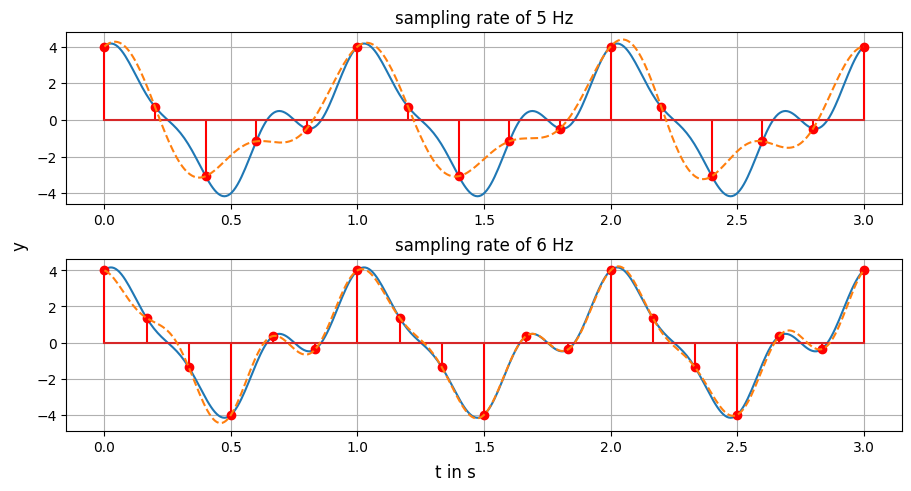

In [159]:
def compare_sampling_rates(axs, signal_fn, fs_vals, seconds, title_add=None):
    for ax, fs in zip(axs, fs_vals):
        n_vals = np.linspace(0, seconds, num=seconds * fs + 1)
        alt_s = signal_fn(n_vals)
        t_vals = np.linspace(0, seconds, num=400)
        plot_with_reconstruction(ax, fs, n_vals, signal_fn(t_vals), alt_s)
        title = f"sampling rate of {fs} Hz"
        if title_add is not None:
            title = title_add + ", " + title
        ax.title.set_text(title)

fig, axs = plt.subplots(nrows=2, constrained_layout=True)
fig.supxlabel("t in s")
fig.supylabel("y")
fig.set_figwidth(9)
compare_sampling_rates(axs, signal_vals, (5, 6), 3)

Q: Can the original signal be reconstructed well from the sampled values? \
A: Yes, it can.

Q: Is the reconstruction equally good for all values? Why not? \
A: No, it is noticibly worse at the edges (close to $t = 0$ and close to $t = 3$). The reason is that the reconstruction algorithm implicitly assumes that all the values which were not provided are $0$.

Q: What happens if you increase or decrease the sampling frequency? \
A: All values $6$ and above provide good reconstructions if you disregard the edges of the graph. As soon as $f_s$ is $5$ or lower, the signal can no longer be reconstructed.

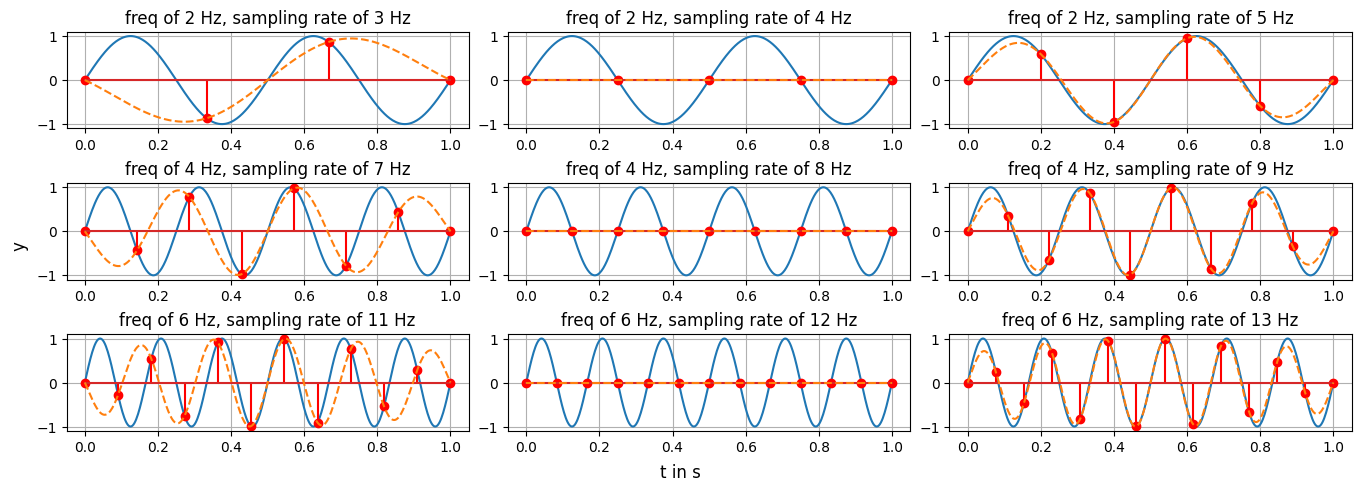

In [160]:
def sine_vals(t, freq):
	return np.sin(t * (2 * np.pi * freq))

fig, axs = plt.subplots(nrows=3, ncols=3, constrained_layout=True)
fig.supxlabel("t in s")
fig.supylabel("y")
fig.set_figwidth(13.5)
compare_sampling_rates(axs[0], lambda t: sine_vals(t, 2), (3, 4, 5), 1, "freq of 2 Hz")
compare_sampling_rates(axs[1], lambda t: sine_vals(t, 4), (7, 8, 9), 1, "freq of 4 Hz")
compare_sampling_rates(axs[2], lambda t: sine_vals(t, 6), (11, 12, 13), 1, "freq of 6 Hz")

For $2\,\mathrm{Hz}$, the sampling frequency needs to be at least $5\,\mathrm{Hz}$. \
For $4\,\mathrm{Hz}$, the sampling frequency needs to be at least $9\,\mathrm{Hz}$. \
For $6\,\mathrm{Hz}$, the sampling frequency needs to be at least $13\,\mathrm{Hz}$.

**Sampling theorem, based on the above observations:** For the reconstruction of the analog signal to be possible, the sampling frequency needs to be more than twice as large as any of the frequencies of the underlying sine functions.